Decision Tree Metrics:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


/home/isaacdev/Developments/MyProjects/AI_Toolkit_Explorer/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 27ms/step - accuracy: 0.9538 - loss: 0.1545 - val_accuracy: 0.9850 - val_loss: 0.0502
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.9847 - loss: 0.0493 - val_accuracy: 0.9895 - val_loss: 0.0443
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9922 - val_loss: 0.0320
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9900 - val_loss: 0.0413
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9888 - val_loss: 0.0358
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9915 - loss: 0.0293
MNIST CNN Test Accuracy: 0.9915000200271606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


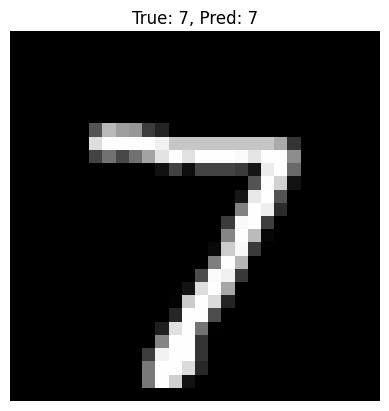

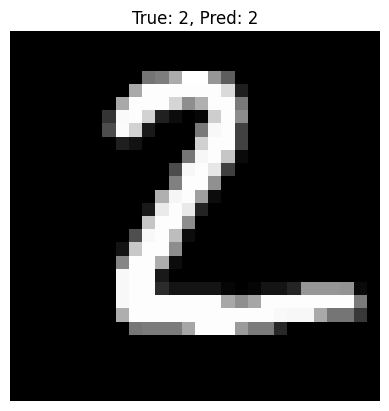

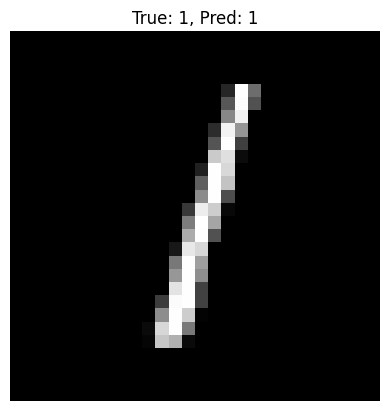

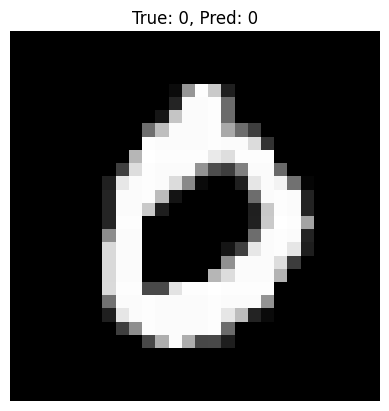

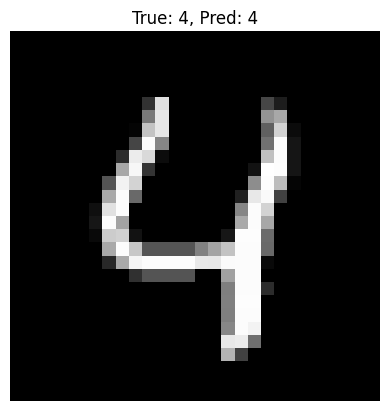


Review: I love the Bose headphones! Sound quality is amazing.
Named Entities:
Bose (NORP)
Sentiment: Positive

Review: The Samsung Galaxy phone stopped working after a week.
Named Entities:
Samsung Galaxy (ORG)
a week (DATE)
Sentiment: Negative

Review: Excellent Nike running shoes, very comfortable!
Named Entities:
Nike (ORG)
Sentiment: Positive


In [1]:
# AI Toolkit Explorer
# Practical AI tasks: Scikit-learn, TensorFlow, PyTorch, spaCy

# -------------------------
# Imports
# -------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

import spacy
nlp = spacy.load("en_core_web_sm")

# -------------------------
# Part 1: Classical ML - Iris Dataset
# -------------------------
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predictions
y_pred = dtc.predict(X_test)

# Evaluation
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

# -------------------------
# Part 2: Deep Learning - MNIST CNN (TensorFlow)
# -------------------------
mnist = tf.keras.datasets.mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Normalize and reshape
X_train_mnist = X_train_mnist.reshape(-1,28,28,1)/255.0
X_test_mnist = X_test_mnist.reshape(-1,28,28,1)/255.0

# Build CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_mnist, y_train_mnist, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = cnn_model.evaluate(X_test_mnist, y_test_mnist)
print("MNIST CNN Test Accuracy:", test_acc)

# Visualize 5 predictions
sample_images = X_test_mnist[:5]
sample_labels = y_test_mnist[:5]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

for i in range(5):
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Pred: {predictions[i]}")
    plt.axis('off')
    plt.show()

# -------------------------
# Part 3: NLP - Amazon Reviews NER & Sentiment
# -------------------------
reviews = [
    "I love the Bose headphones! Sound quality is amazing.",
    "The Samsung Galaxy phone stopped working after a week.",
    "Excellent Nike running shoes, very comfortable!"
]

for review in reviews:
    doc = nlp(review)
    print(f"\nReview: {review}")
    print("Named Entities:")
    for ent in doc.ents:
        print(f"{ent.text} ({ent.label_})")
    
    # Simple sentiment analysis
    positive_words = ["love", "amazing", "excellent", "comfortable"]
    negative_words = ["stopped", "bad", "poor", "disappointing"]
    sentiment_score = sum([review.lower().count(w) for w in positive_words]) - \
                      sum([review.lower().count(w) for w in negative_words])
    sentiment = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"
    print("Sentiment:", sentiment)
